# **Indian Start Funding Analysis-Exploratory Data Analysis**

## **Project Overview**

## Loding and First Look

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

## Load the dataset

In [6]:
df=pd.read_csv("https://raw.githubusercontent.com/Naresh312143/mahalingpur-python-ml/refs/heads/main/Indian%20Unicorn%20startups%202023%20updated.csv")

## Basic dataset information

In [7]:
df.shape

(102, 8)

In [8]:
df.columns.tolist()

['No.',
 'Company',
 'Sector',
 'Entry Valuation^^ ($B)',
 'Valuation ($B)',
 'Entry',
 'Location',
 'Select Investors']

In [9]:
df.head()

,No.,Company,Sector,Entry Valuation^^ ($B),Valuation ($B),Entry,Location,Select Investors
0,1,InMobi,Adtech - Mobile Ads,1.0,1.0,Sep/2011,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank"
1,2,Flipkart^,E-Commerce,1.0,37.6,Feb/2012,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent"
2,3,Mu Sigma,SaaS - Analytics,1.0,1.5,Feb/2013,Bangalore/Chicago,"Accel, Sequoia Capital, General Atlantic"
3,4,Snapdeal*,E-Commerce,1.8,2.4,Oct/2014,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof..."
4,5,PayTM^,Fintech - Payments & Wallet,1.7,16.0,Feb/2015,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber..."


## **Data Quality Assessment**

## Check data types and missing values

In [10]:
df.dtypes

,0
No.,int64
Company,object
Sector,object
Entry Valuation^^ ($B),float64
Valuation ($B),float64
Entry,object
Location,object
Select Investors,object


In [11]:
df.isnull().sum()

,0
No.,0
Company,0
Sector,0
Entry Valuation^^ ($B),0
Valuation ($B),0
Entry,0
Location,0
Select Investors,0


## check for duplicates

In [12]:
df.duplicated().sum()

np.int64(0)

## Basic Statitics

In [13]:
df.describe()

,No.,Entry Valuation^^ ($B),Valuation ($B)
count,102.000000,102.000000,102.000000
mean,51.500000,1.547549,3.398020
std,29.588849,1.138013,4.710657
min,1.000000,1.000000,0.568000
25%,26.250000,1.000000,1.200000
50%,51.500000,1.200000,1.850000
75%,76.750000,1.582500,3.475000
max,102.000000,10.000000,37.600000


## **Data Preprocessing**

## Clean column names

In [14]:
df.columns=df.columns.str.strip()

## Convert Entry column to datetime

In [15]:
df['Entry_Date']=pd.to_datetime(df['Entry'],format='%b/%Y')
df['Entry_Year']=df['Entry_Date'].dt.year
df.head()

,No.,Company,Sector,Entry Valuation^^ ($B),Valuation ($B),Entry,Location,Select Investors,Entry_Date,Entry_Year
0,1,InMobi,Adtech - Mobile Ads,1.0,1.0,Sep/2011,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank",2011-09-01,2011
1,2,Flipkart^,E-Commerce,1.0,37.6,Feb/2012,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent",2012-02-01,2012
2,3,Mu Sigma,SaaS - Analytics,1.0,1.5,Feb/2013,Bangalore/Chicago,"Accel, Sequoia Capital, General Atlantic",2013-02-01,2013
3,4,Snapdeal*,E-Commerce,1.8,2.4,Oct/2014,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof...",2014-10-01,2014
4,5,PayTM^,Fintech - Payments & Wallet,1.7,16.0,Feb/2015,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber...",2015-02-01,2015


In [16]:
df.dtypes

,0
No.,int64
Company,object
Sector,object
Entry Valuation^^ ($B),float64
Valuation ($B),float64
Entry,object
Location,object
Select Investors,object
Entry_Date,datetime64[ns]
Entry_Year,int32


## **Create valuation grow metix**

In [17]:
df['valuation_Growth']=df['Valuation ($B)']/df['Entry Valuation^^ ($B)']
df.head()

,No.,Company,Sector,Entry Valuation^^ ($B),Valuation ($B),Entry,Location,Select Investors,Entry_Date,Entry_Year,valuation_Growth
0,1,InMobi,Adtech - Mobile Ads,1.0,1.0,Sep/2011,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank",2011-09-01,2011,1.000000
1,2,Flipkart^,E-Commerce,1.0,37.6,Feb/2012,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent",2012-02-01,2012,37.600000
2,3,Mu Sigma,SaaS - Analytics,1.0,1.5,Feb/2013,Bangalore/Chicago,"Accel, Sequoia Capital, General Atlantic",2013-02-01,2013,1.500000
3,4,Snapdeal*,E-Commerce,1.8,2.4,Oct/2014,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof...",2014-10-01,2014,1.333333
4,5,PayTM^,Fintech - Payments & Wallet,1.7,16.0,Feb/2015,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber...",2015-02-01,2015,9.411765


## **Extract primary city(before'/')**

In [18]:
df['Primary_City']=df['Location'].str.split('/').str[0]
df.head()

,No.,Company,Sector,Entry Valuation^^ ($B),Valuation ($B),Entry,Location,Select Investors,Entry_Date,Entry_Year,valuation_Growth,Primary_City
0,1,InMobi,Adtech - Mobile Ads,1.0,1.0,Sep/2011,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank",2011-09-01,2011,1.000000,Bangalore
1,2,Flipkart^,E-Commerce,1.0,37.6,Feb/2012,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent",2012-02-01,2012,37.600000,Bangalore
2,3,Mu Sigma,SaaS - Analytics,1.0,1.5,Feb/2013,Bangalore/Chicago,"Accel, Sequoia Capital, General Atlantic",2013-02-01,2013,1.500000,Bangalore
3,4,Snapdeal*,E-Commerce,1.8,2.4,Oct/2014,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof...",2014-10-01,2014,1.333333,Delhi
4,5,PayTM^,Fintech - Payments & Wallet,1.7,16.0,Feb/2015,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber...",2015-02-01,2015,9.411765,Noida


## Count number of investors

In [19]:
df['Investor_Count']=df['Select Investors'].str.count(',')+1
df.head()

,No.,Company,Sector,Entry Valuation^^ ($B),Valuation ($B),Entry,Location,Select Investors,Entry_Date,Entry_Year,valuation_Growth,Primary_City,Investor_Count
0,1,InMobi,Adtech - Mobile Ads,1.0,1.0,Sep/2011,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank",2011-09-01,2011,1.000000,Bangalore,3
1,2,Flipkart^,E-Commerce,1.0,37.6,Feb/2012,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent",2012-02-01,2012,37.600000,Bangalore,5
2,3,Mu Sigma,SaaS - Analytics,1.0,1.5,Feb/2013,Bangalore/Chicago,"Accel, Sequoia Capital, General Atlantic",2013-02-01,2013,1.500000,Bangalore,3
3,4,Snapdeal*,E-Commerce,1.8,2.4,Oct/2014,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof...",2014-10-01,2014,1.333333,Delhi,5
4,5,PayTM^,Fintech - Payments & Wallet,1.7,16.0,Feb/2015,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber...",2015-02-01,2015,9.411765,Noida,4


# **Univariate Analysis**

## Valuation Distribution Analysis

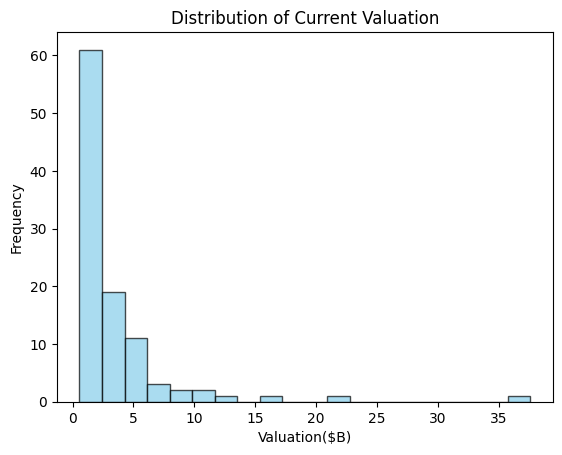

In [20]:
plt.hist(df['Valuation ($B)'],bins=20,alpha=0.7,color='skyblue',edgecolor='black')
plt.title('Distribution of Current Valuation')
plt.xlabel('Valuation($B)')
plt.ylabel('Frequency')
plt.show()

# **Sector Analysis**

## Sector distribution

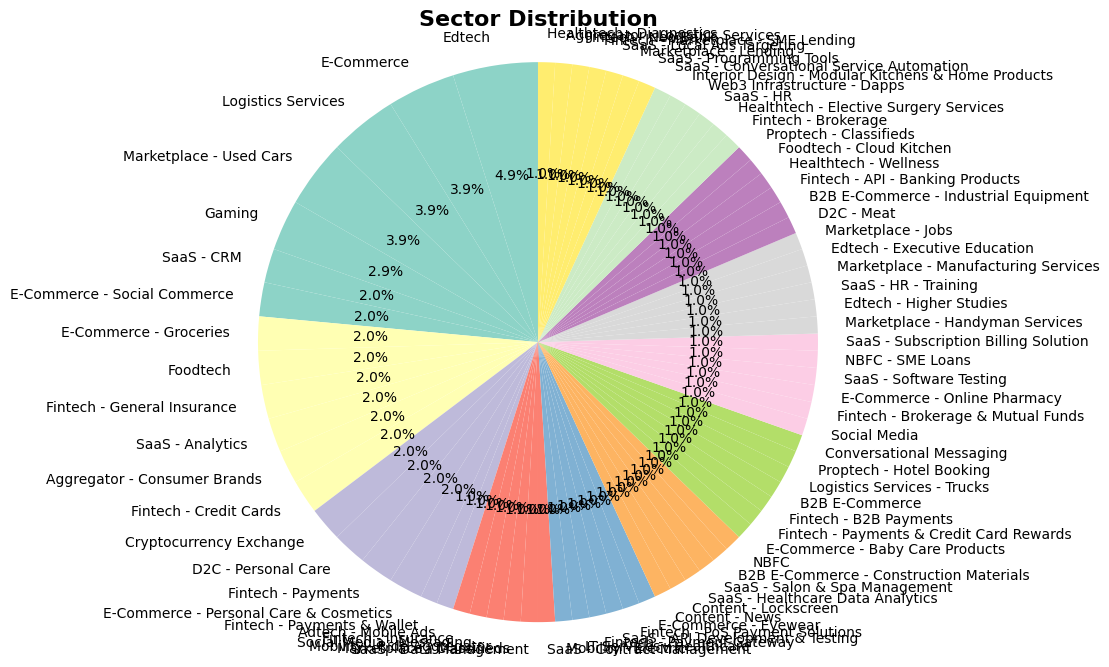

In [21]:
plt.figure(figsize=(12,8))
sector_counts=df['Sector'].value_counts()
colors=plt.cm.Set3(np.linspace(0,1,len(sector_counts)))
plt.pie(sector_counts,labels=sector_counts.index,colors=colors,autopct='%1.1f%%',startangle=90)
plt.title('Sector Distribution',fontsize=16,fontweight='bold')
plt.axis('equal')
plt.show()

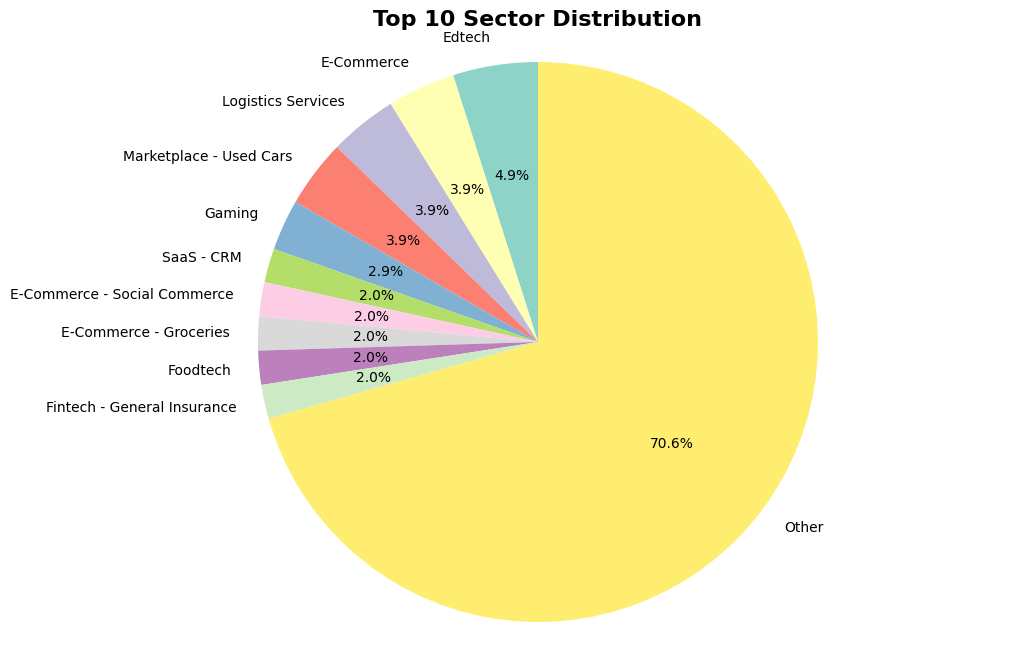

In [22]:

def display_top_k_sectors(df,k):
  sector_counts=df['Sector'].value_counts()

  if k< len(sector_counts):
    top_sectors=sector_counts.head(k)
    other_sector_count=sector_counts[k:].sum()
    top_sectors['Other']=other_sector_count
  else:
    top_sectors=sector_counts

  plt.figure(figsize=(12,8))
  colors=plt.cm.Set3(np.linspace(0,1,len(top_sectors)))
  plt.pie(top_sectors,labels=top_sectors.index,autopct='%1.1f%%',colors=colors,startangle=90)
  plt.axis('equal')
  plt.title(f'Top {k} Sector Distribution',fontsize=16,fontweight='bold')
  plt.show()

display_top_k_sectors(df,10)

## Top sector ar chat

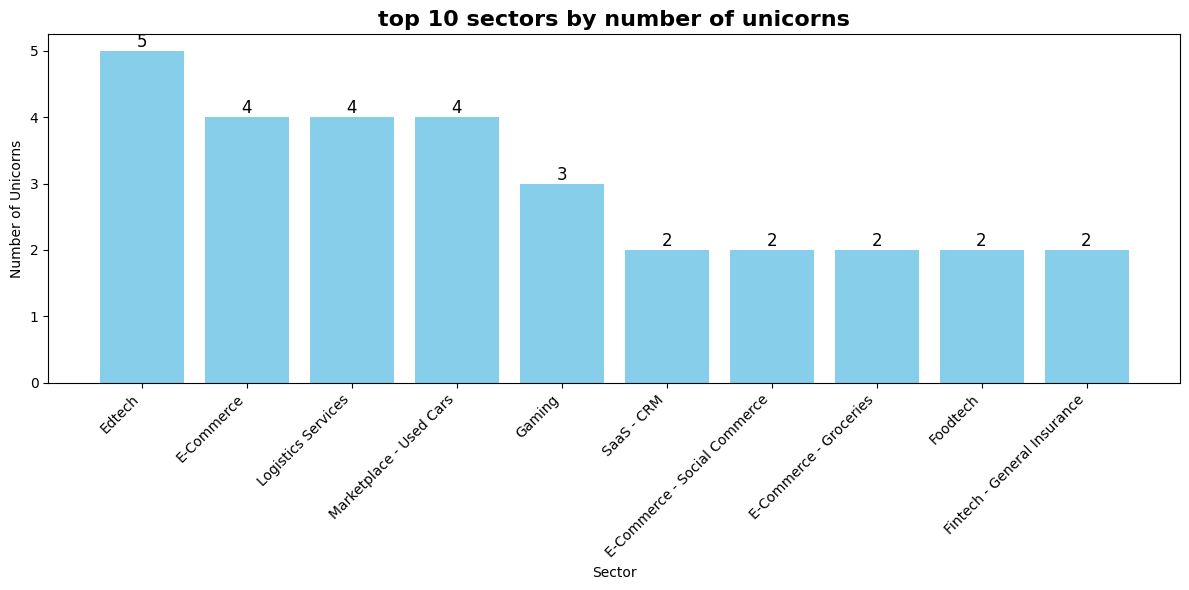

In [23]:
plt.figure(figsize=(12,6))
top_sectors=sector_counts.head(10)
bars=plt.bar(range(len(top_sectors)),top_sectors.values,color='skyblue',align='center')
plt.title('top 10 sectors by number of unicorns',fontsize=16,fontweight='bold')
plt.xlabel('Sector')
plt.ylabel('Number of Unicorns')
plt.xticks(range(len(top_sectors)),top_sectors.index,rotation=45,ha='right')
for bar,value in zip(bars,top_sectors.values):
  plt.text(bar.get_x()+bar.get_width()/2,bar.get_height(),str(value),ha='center',va='bottom',fontsize=12)
plt.tight_layout()
plt.show()

# Geographic Distribution

# key insights

*   EdTech leads with highest number of unicorns

*   E-commerce and SaaS are major contributors
*   Edtech emergence as significant sector


*   Diversification across multiple sector



# **Geographic Distribution**

# city_wise distribution

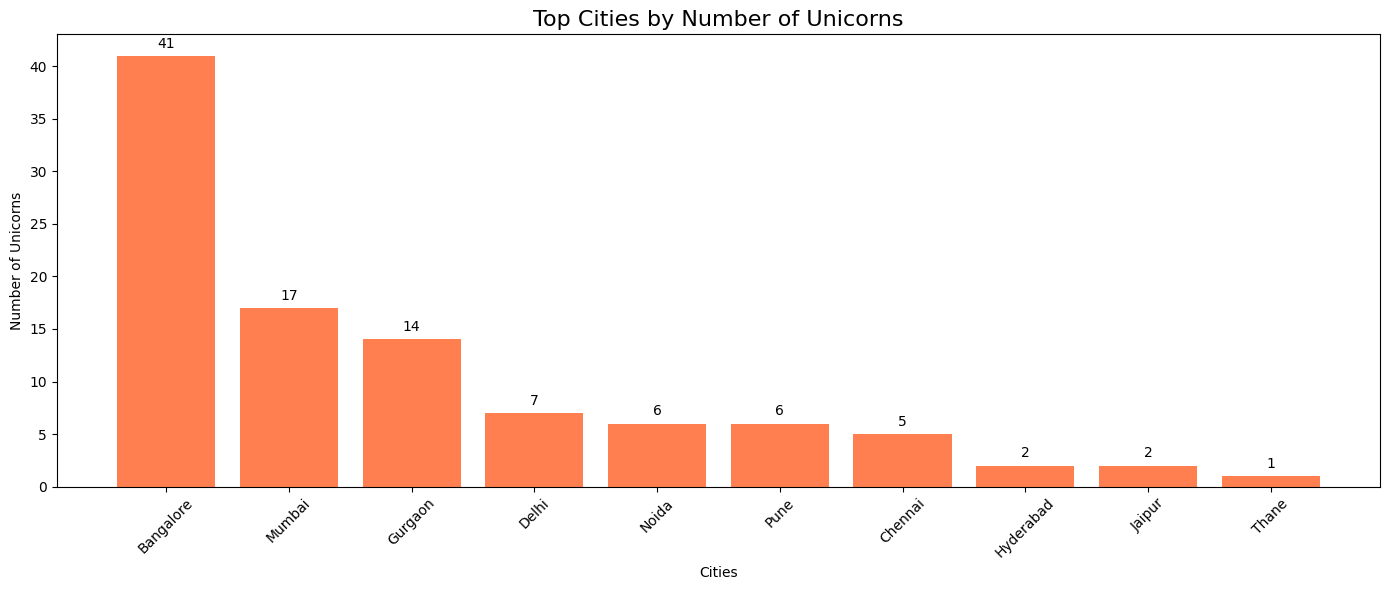

In [24]:
plt.figure(figsize=(14,6))
city_count = df['Primary_City'].value_counts().head(10)
bars = plt.bar(city_count.index,city_count.values,color='coral')
plt.title('Top Cities by Number of Unicorns',fontsize=16,fontweight='20')
plt.xlabel('Cities')
plt.ylabel('Number of Unicorns')
plt.xticks(rotation=45)
for bar,value in zip(bars,city_count.values):
    plt.text(bar.get_x()+bar.get_width()/2,bar.get_height() + 0.5,str(value),ha='center',va='bottom')
plt.tight_layout()
plt.show()

## Create a summery table

In [25]:
city_summary=df.groupby('Primary_City').agg({'Valuation ($B)':['count','sum','mean'],'Entry_Year':['min','max']}).round(2)
city_summary.columns=['count','total_valuation','avg_valuation','start_year','end_year']
display(city_summary.head())

,count,total_valuation,avg_valuation,start_year,end_year
Primary_City,,,,,
Bangalore,41,185.20,4.52,2011,2022
Chennai,5,12.20,2.44,2018,2022
Delhi,7,15.53,2.22,2014,2022
Goa,1,1.53,1.53,2022,2022
Gurgaon,14,37.94,2.71,2015,2022


# **Key Insights:**

*   Bangalore dominates with highest number of unicorns
*   Mumbai and Gurgaon are other major hubs
*   Geographic concentratiuon in tech cities
*  Bangalore leads in both count and total valuation



## Temporal Analysis

## Entry Years Trends

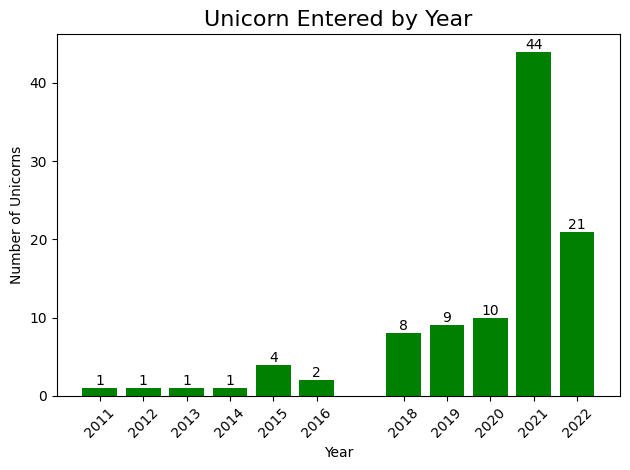

In [28]:

yearly_entries =df['Entry_Year'].value_counts().sort_index()
bars = plt.bar(yearly_entries.index,yearly_entries.values,color='green')
plt.title('Unicorn Entered by Year',fontsize=16,fontweight='20')
plt.xlabel('Year')
plt.ylabel('Number of Unicorns')
plt.xticks(yearly_entries.index,rotation=45)

for bar,value in zip(bars,yearly_entries.values):
    plt.text(bar.get_x()+bar.get_width()/2,bar.get_height(),str(value),ha='center',va='bottom')
plt.tight_layout()
plt.show()

## cumulative unicorns

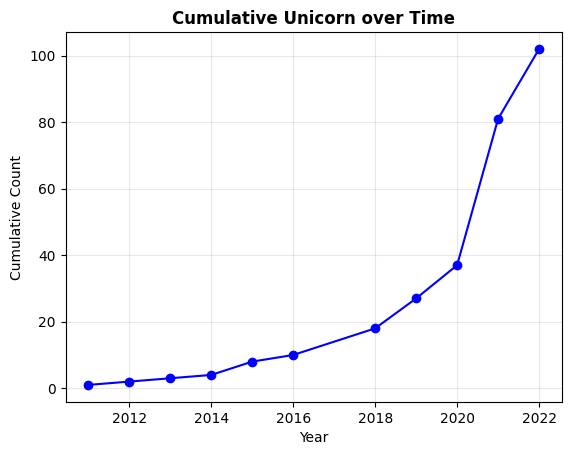

In [29]:
cummulative = yearly_entries.cumsum()
plt.plot(cummulative.index,cummulative.values,marker='o',linestyle='-',color='blue')
plt.title('Cumulative Unicorn over Time',fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Cumulative Count')
plt.grid(True,alpha=0.3)
plt.show()


## Average  valuation by year

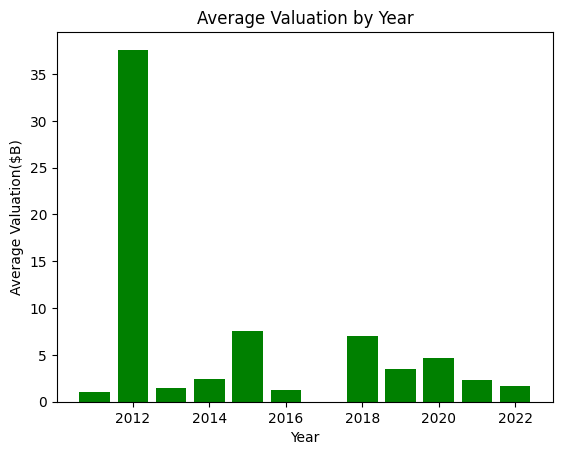

In [30]:
avg_val_by_year=df.groupby('Entry_Year')['Valuation ($B)'].mean()
plt.bar(avg_val_by_year.index,avg_val_by_year.values,color='green')
plt.title('Average Valuation by Year')
plt.xlabel('Year')
plt.ylabel('Average Valuation($B)')
plt.show()

## Sector evoluation over time

<Figure size 1500x800 with 0 Axes>

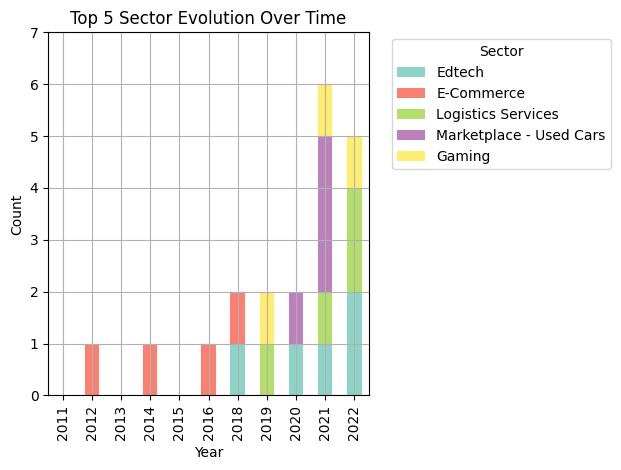

In [31]:
def display_k_sectors_evolution(df,k):
  sector_year=df.groupby(['Entry_Year','Sector']).size().unstack(fill_value=0)
  top_k_sectors_names=df['Sector'].value_counts().head(k).index.tolist()
  sector_year=sector_year[top_k_sectors_names]
  plt.figure(figsize=(15,8))
  sector_year.plot(kind='bar',stacked=True,color=plt.cm.Set3(np.linspace(0,1,k)))
  plt.title(f'Top {k} Sector Evolution Over Time')
  plt.xlabel('Year')
  plt.ylabel('Count')
  plt.legend(title='Sector',bbox_to_anchor=(1.05,1),loc='upper left')
  plt.yticks(range(0,sector_year.values.max()+5))
  plt.grid(True)
  plt.tight_layout()
  plt.show()
display_k_sectors_evolution(df,5)